<a href="https://colab.research.google.com/github/MileneCV/Stroke_Prediction_project_2/blob/main/stroke_prediction_dez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**name:** Milene Carmes Vallejo

**last updated:** 12/282022

# Stroke Prediction Dataset 




## Project Description 

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.


## Data Source
**Kaggle** : https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

## Data **Dictionary**
1) **id:** unique identifier

2) **gender:** "Male", "Female" or "Other"

3) **age:** age of the patient

4) **hypertension:** 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) **heart_disease:** 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) **ever_married:** "No" or "Yes"

7) **work_type:** "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) **Residence_type:** "Rural" or "Urban"

9) **avg_glucose_level:**  average glucose level in blood

10) **bmi:** body mass index

11) **smoking_status:** "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) **stroke:**1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

## Import libraries

In [1]:
!pip uninstall -y numpy
!pip uninstall -y setuptools
!pip install setuptools
!pip install numpy

Found existing installation: numpy 1.24.1
Uninstalling numpy-1.24.1:
  Successfully uninstalled numpy-1.24.1
Found existing installation: setuptools 65.6.3
Uninstalling setuptools-65.6.3:
  Successfully uninstalled setuptools-65.6.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached setuptools-65.6.3-py3-none-any.whl (1.2 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.1.5 requires numpy>=1.15.0, which is not installed.
tensorflow 2.9.2 requires numpy>=1.20, which is not installed.
tensorboard 2.9.1 requires numpy>=1.12.0, which is not installed.
spacy 3.4.4 requires numpy>=1.15.0, which is not installed.
prophet 1.1.1 requires numpy>=1.15.4, which is not installed.
pandas-gbq 0.17.9 requires numpy>=1.16.6, which is not installed.
numba 0.56.4 requires numpy<1.24,>=1.18, which is not ins

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.24.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.1 which is incompatible.


In [2]:
!pip install dython
!pip install matplotlib==3.5.3 
# Explore correlations
from dython.nominal import associations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [193]:
import pandas as pd 
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import missingno as msno
# Machine Learning imports 
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import (make_column_selector, make_column_transformer)
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from seaborn import heatmap
from sklearn import set_config
set_config(display='diagram')
#import imblearn pipeline
from imblearn.pipeline import make_pipeline as make_sampler_pipeline
from imblearn.over_sampling import SMOTE




## Load data

In [5]:
drive.mount('/content/drive')
filename = '/content/drive/My Drive/stroke_prediction_dataset.csv'
df = pd.read_csv(filename)

Mounted at /content/drive


In [6]:
# make a copy
df_copy = df.copy()

In [7]:
df_copy.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
# copy df
df_copy.shape

(5110, 12)

###  Display Column Names, Count of Non-Null Values, and Data Types

In [9]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Prepare/clean the data

### Dropping unnecessary columns.



In [10]:
# Calculate the count of unique values and the cardinality for id column
unique_values = df_copy.shape[0]
cardinality = (df_copy['id'].value_counts().sum())/(df.shape[0])*100
# Display the count of unique values and the cardinality for this column
print(f'This column has {unique_values} unique values which is {cardinality}% cardinality.')

This column has 5110 unique values which is 100.0% cardinality.


In [11]:
# We will drop the id column since this column is a unique identifier.
df_copy = df_copy.drop(columns='id')


In [12]:
# Confirm column has been dropped.
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


### Duplicated Data
Checking for duplicated data:

In [13]:
# Display the number of duplicate rows in the dataset
print(f'There are {df_copy.duplicated().sum()} duplicate rows.')


There are 0 duplicate rows.


### Missing Values
Checking for missing values:


In [14]:
df_copy.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Identifying % of missing data

In [15]:
df_copy.isna().sum()/len(df_copy)*100

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

There are 201 missing values in bmi column (3.93%). We will fill in the missing values with the mean of bmi. 

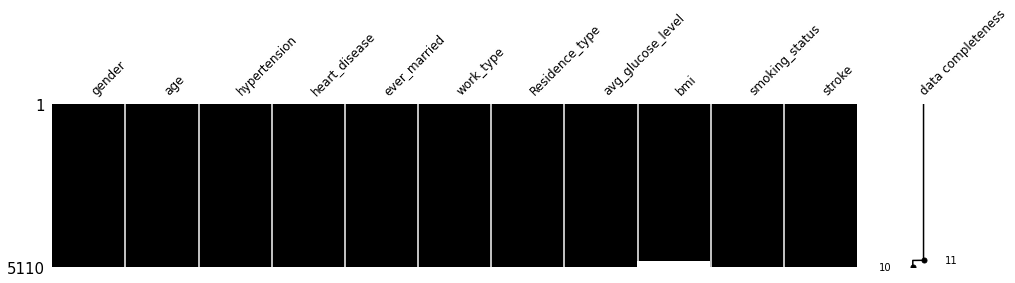

In [16]:
# Display missing values by column
msno.matrix(df_copy, figsize=(16,3), labels=True, 
            fontsize=12, sort="descending", color=(0,0,0));

In [17]:
# find mean of bmi
mean_bmi = df_copy['bmi'].mean()
mean_bmi

28.893236911794666

In [18]:
# replace Nan in bmi column by mean_bmi
df_copy['bmi'].fillna(mean_bmi, inplace=True)

- Checking to make sure the values for the `bmi` column were filled in.

In [19]:
df_copy.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Inspect Column Datatypes for Errors

- We will now address the data types and make sure that they match the data dictionary.

- Columns with mixed datatypes are identified as an object datatype

In [20]:
df_copy.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

hypertension and heart_disease are object, I will change in machine learning part to use ohe. 

### Inspect Column Values for Errors

#### Categorical columns

In [21]:
# find categorical columns
df_types = df_copy.dtypes
string_cols = df_types[df_copy.dtypes=='object'].index
string_cols

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

##### **gender column**

In [22]:
df_copy['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

##### **ever_married column**

In [23]:
df_copy['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

##### **work_type column**

In [24]:
df_copy['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

##### **Residence_type column**

In [25]:
df_copy['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

##### **smoking_status column**

In [26]:
df_copy['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

#### Float columns

In [27]:
# find float columns
float_cols = df_types[df_copy.dtypes=='float'].index
float_cols

Index(['age', 'avg_glucose_level', 'bmi'], dtype='object')

##### **Age column**

In [28]:
df_copy['age'].describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

##### **Avg_glucose_level column**

In [29]:
df_copy['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

##### **bmi**

In [30]:
df_copy['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

There is no inconsistent values. 

#### Integer column

In [31]:
# find integer columns
integer_cols = df_types[df_copy.dtypes=='int64'].index
integer_cols

Index(['hypertension', 'heart_disease', 'stroke'], dtype='object')

##### **hypertension column**

In [32]:
df_copy['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

##### **heart_disease column**

In [33]:
df_copy['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

##### **stroke column**

In [34]:
df_copy['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

There is no inconsistent values. 

### Summary statistics for numeric columns

In [35]:
df_copy.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Exploratory Data Analysis



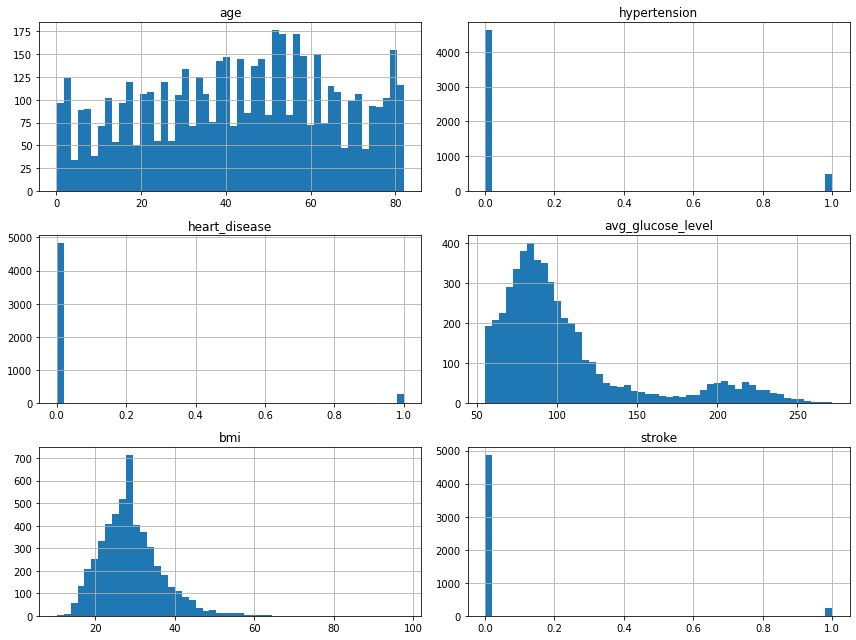

In [36]:
# Display histogram charts for the numeric columns in the dataframe
df_copy.hist(figsize=(12,9), bins=50)
plt.tight_layout()
plt.show;

#### Univariate visuals for the target and all features

In [37]:
# to make easer the visualization I will replace 0:no and 1:yes
df_string = df_copy.copy()
df_string['stroke'] = df_string['stroke'].replace({0:'no', 1:'yes'})
df_string['hypertension'] = df_string['hypertension'].replace({0:'no', 1:'yes'})
df_string['heart_disease'] = df_string['heart_disease'].replace({0:'no', 1:'yes'})


In [38]:
# select categorical columns
df_types = df_string.dtypes
string_cols = df_types[df_string.dtypes=='object'].index
string_cols

Index(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'smoking_status', 'stroke'],
      dtype='object')

I will create a function to plot all string columns

In [53]:
def plot_bar_all_features(df1,x, y):
  fig, ax = plt.subplots(figsize=(8,5))
  counts_x = df1[x].value_counts(normalize=True)
  print(f'Value_counts {x}')
  print(counts_x)
  print('\n', '\n')
  counts_x.plot(kind='barh')
  ax.set_facecolor("lightgray")
 
  ax.set_title(f'Frequencies of {y}', fontsize = 20, fontweight = 'bold');
  ax.set_ylabel(f'Categories for {y}', fontsize = 15, fontweight = 'bold')
  ax.set_xlabel('Normalize Counts', fontsize = 15, fontweight = 'bold')
  plt.xticks(fontsize = 15)#, weight='bold')
  plt.yticks(fontsize = 15)#, weight='bold')
 


Value_counts gender
Female    0.585910
Male      0.413894
Other     0.000196
Name: gender, dtype: float64

 



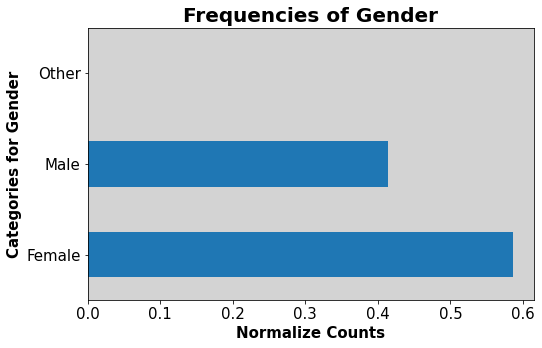

In [54]:
plot_bar_all_features(df_string, 'gender', 'Gender')

There are more female about 60%, male are about 40%. 

---



Value_counts hypertension
no     0.902544
yes    0.097456
Name: hypertension, dtype: float64

 



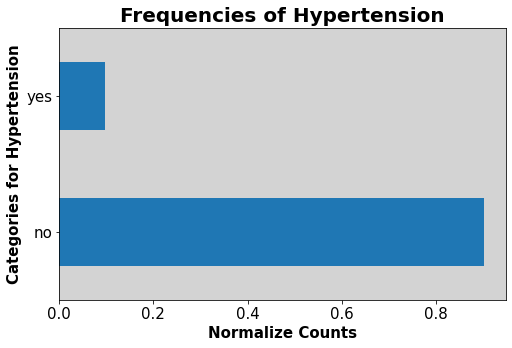

In [55]:
plot_bar_all_features(df_string, 'hypertension', 'Hypertension')

About 90% of patients don't have hypertension and 10% have hypertension

Value_counts heart_disease
no     0.945988
yes    0.054012
Name: heart_disease, dtype: float64

 



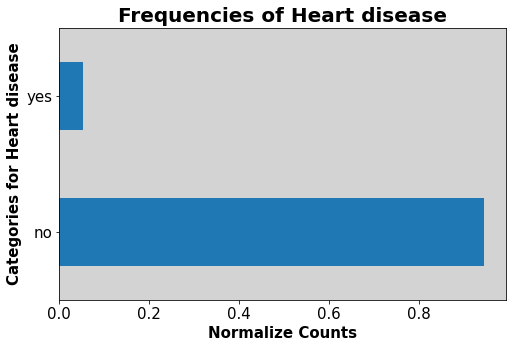

In [56]:
plot_bar_all_features(df_string, 'heart_disease', 'Heart disease')

About 95% of patinents have heart disease

Value_counts ever_married
Yes    0.656164
No     0.343836
Name: ever_married, dtype: float64

 



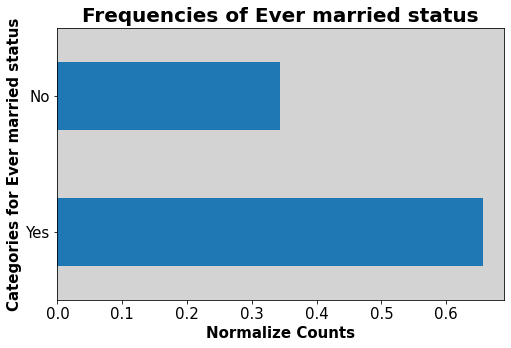

In [57]:
plot_bar_all_features(df_string, 'ever_married', 'Ever married status')

About 65% of patients are married.

Value_counts work_type
Private          0.572407
Self-employed    0.160274
children         0.134442
Govt_job         0.128571
Never_worked     0.004305
Name: work_type, dtype: float64

 



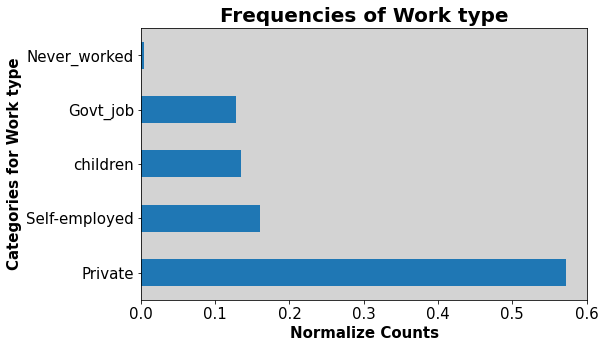

In [58]:
plot_bar_all_features(df_string, 'work_type', 'Work type')

Most of patients have private jobs. 

Value_counts Residence_type
Urban    0.508023
Rural    0.491977
Name: Residence_type, dtype: float64

 



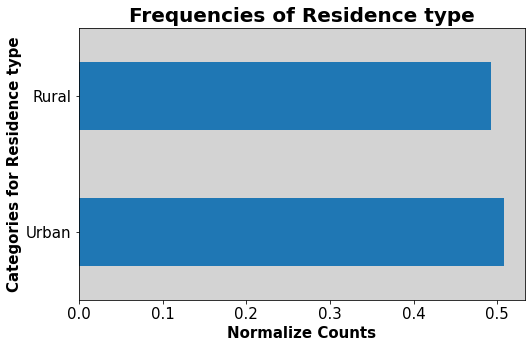

In [59]:
plot_bar_all_features(df_string, 'Residence_type', 'Residence type')

It is very similar the type of residence almost 50% urban and rural. 

Value_counts smoking_status
never smoked       0.370254
Unknown            0.302153
formerly smoked    0.173190
smokes             0.154403
Name: smoking_status, dtype: float64

 



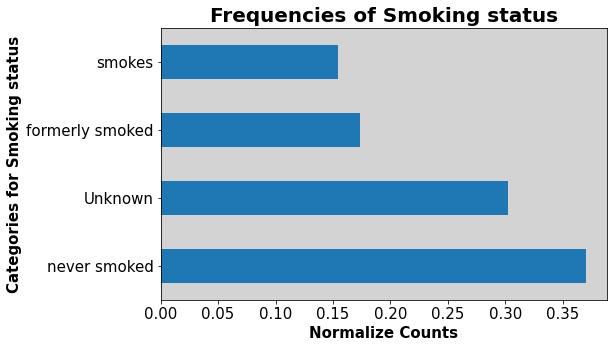

In [60]:
plot_bar_all_features(df_string, 'smoking_status', 'Smoking status')

Most of patients, more than 35% never smoked. But the percentage of unknowm is high, about 30%. 

Value_counts stroke
no     0.951272
yes    0.048728
Name: stroke, dtype: float64

 



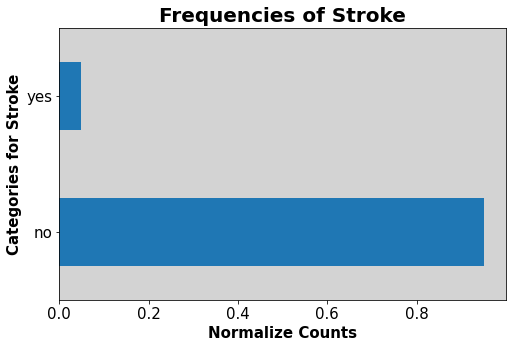

In [61]:
plot_bar_all_features(df_string, 'stroke', 'Stroke')

Most of patients, about 95% didn't have stroke and 5% had. 

I will create a function to make histplot to numbers columns

In [69]:
def histplot_all_features(df,col,y):
    fig, ax = plt.subplots(figsize=(8,5))
    sns.histplot(data=df,x = col)
    mean_value = df[col].mean()
    ax.axvline(mean_value,color='red', ls='--', 
           label=f"Mean Value = ${mean_value:,.2f}")
    ax.legend()
    ax.set_facecolor("lightgray")

    ax.set_title(f'Distribution of {y}', fontsize = 20, fontweight = 'bold');
    ax.set_ylabel(f'Count', fontsize = 15, fontweight = 'bold')
    ax.set_xlabel(col, fontsize = 15, fontweight = 'bold')
    #plt.tight_layout()
    plt.xticks(fontsize = 12, weight='bold')
    plt.yticks(fontsize = 12, weight='bold')
    plt.show()

In [63]:
# find number columns
number_cols = df_types[df_string.dtypes=='float'].index
number_cols

Index(['age', 'avg_glucose_level', 'bmi'], dtype='object')

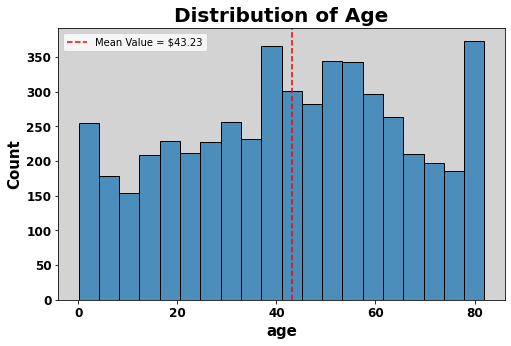

In [70]:
histplot_all_features(df_string,'age', 'Age')

The age of patients is very different there are babys with months to old people with 80 years old. The mean is 43.

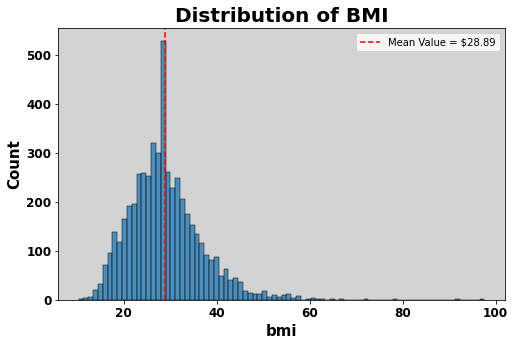

In [71]:
histplot_all_features(df_string,'bmi', 'BMI')

Most of the pacients have bmi between 20 to 40. The mean is 28.9

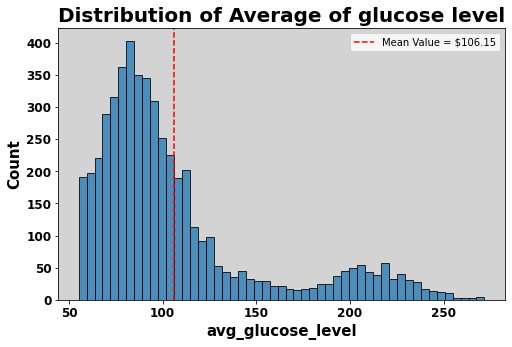

In [72]:
histplot_all_features(df_string,'avg_glucose_level', 'Average of glucose level')

Most of patients have normal level of glucose, below 100. 

#### Comparation of all features in patients who had a stroke and didn't have. 

As we see in barplot with stroke column  the dataset is unbalaced: 95% of patients didn't have stroke and less than 5% of patients had a stroke. Now I will compare all features in patients who had stroke and didn't have stroke. 


Let's groupby stroke to investigate the average of patients who had stroke and didn't.


In [73]:
stroke_groupby = df_string.groupby('stroke')
for col in df_string.columns:
  print('\n', col)
  display(stroke_groupby[col].describe())
  print('\n')
  print('\n')



 gender


,count,unique,top,freq
stroke,,,,
no,4861,3,Female,2853
yes,249,2,Female,141







 age


,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
no,4861.0,41.971545,22.291940,0.08,24.0,43.0,59.0,82.0
yes,249.0,67.728193,12.727419,1.32,59.0,71.0,78.0,82.0







 hypertension


,count,unique,top,freq
stroke,,,,
no,4861,2,no,4429
yes,249,2,no,183







 heart_disease


,count,unique,top,freq
stroke,,,,
no,4861,2,no,4632
yes,249,2,no,202







 ever_married


,count,unique,top,freq
stroke,,,,
no,4861,2,Yes,3133
yes,249,2,Yes,220







 work_type


,count,unique,top,freq
stroke,,,,
no,4861,5,Private,2776
yes,249,4,Private,149







 Residence_type


,count,unique,top,freq
stroke,,,,
no,4861,2,Urban,2461
yes,249,2,Urban,135







 avg_glucose_level


,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
no,4861.0,104.795513,43.846069,55.12,77.12,91.47,112.83,267.76
yes,249.0,132.544739,61.921056,56.11,79.79,105.22,196.71,271.74







 bmi


,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
no,4861.0,28.825388,7.776203,10.3,23.6,28.300000,32.8,97.6
yes,249.0,30.217789,5.825589,16.9,27.0,28.893237,32.5,56.6







 smoking_status


,count,unique,top,freq
stroke,,,,
no,4861,4,never smoked,1802
yes,249,4,never smoked,90







 stroke


,count,unique,top,freq
stroke,,,,
no,4861,1,no,4861
yes,249,1,yes,249


# Explanotory Visuals and Analysis

Split the dataset in patients who had stroke or not and investigate possible correlation with stroke and other features. 

In [74]:
# had stroke 
df_stroke = df_string.loc[df_string['stroke']=='yes']
# no stroke
df_no_stroke = df_string.loc[df_string['stroke']=='no']


##### Create a function to plot a boxplot for the selected column

In [83]:
def outliers_check(df1,df2,col):
  # function to plot a boxplot for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True)

  sns.boxplot(data=df1, x = col, ax = axes[0])

  ## Updating title of top graph to df1  
  axes[0].set_title(f' Outliers of {col} in patients who had stoke', fontsize = 15, fontweight = 'bold')
  axes[0].set_facecolor("lightgray")

  sns.boxplot(data=df2, x = col, ax = axes[1])
  

  ## Updating title of top graph to df 2 
  axes[1].set_title(f'Outliers of {col} in patients who did not have stroke', fontsize = 15, fontweight = 'bold' )
  axes[1].set_facecolor("lightgray")

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()
  

##### Create a function to plot a histplot for the selected column

In [76]:
def histplot_function(df1,df2,col):
  # function to plot a histogram for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  # df1:
  sns.histplot(data=df1,x = col,ax = axes[0])
  mean_value = df1[col].mean()
  axes[0].axvline(mean_value,color='red', ls='--', 
           label=f"Mean Value = ${mean_value:,.2f}",);
  axes[0].legend()
  axes[0].set_facecolor("lightgray")

  med_value = df1[col].median()
  axes[0].axvline(med_value,color='black', ls='--', 
           label=f"Median Value = ${med_value:,.2f}");
  axes[0].legend()
  axes[0].set_title(f' Distribution of {col} in patients who had stoke', fontsize = 15, fontweight = 'bold')
  

  #df2
  sns.histplot(data=df2,x = col,ax = axes[1])
  mean_value = df2[col].mean()
  axes[1].axvline(mean_value,color='red', ls='--', 
           label=f"Mean Value = ${mean_value:,.2f}",);
  axes[1].legend()

  med_value = df2[col].median()
  axes[1].axvline(med_value,color='black', ls='--', 
           label=f"Median Value = ${med_value:,.2f}");
  axes[1].legend()
  axes[1].set_facecolor("lightgray")


  ## Updating title of top graph to df 2 
  axes[1].set_title(f'Distribution of {col} in patients who did not have stroke', fontsize = 15, fontweight = 'bold' )

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()

##### Create a function to plot a barplot 

In [77]:
sns.blend_palette(['blue', 'red'])

[(0.0, 0.0, 1.0),
 (0.2, 0.0, 0.8),
 (0.4, 0.0, 0.6),
 (0.6, 0.0, 0.4),
 (0.8, 0.0, 0.19999999999999996),
 (1.0, 0.0, 0.0)]

In [90]:
def plot_bar(df1,df2,x):
  palette = sns.blend_palette(['blue', 'red'])
  ## Make a larger fig/ax before plotting
  fig, axes = plt.subplots(ncols=2, figsize=(10,5), sharey=True)
  ## counts, counts up the categories, sort the values, then puts them in a data frame.
  # count df1 = stroke
  df1[x] = df1[x].replace({0:'no', 1:'yes'})
  counts_stroke = df1[x].value_counts(normalize=True).sort_values(ascending=False).to_frame()
  ## ploting the barplot of df_stroke
  sns.barplot(data=counts_stroke,x=counts_stroke.index, y = counts_stroke[x], ax = axes[0],palette= palette)
  axes[0].set_title('had stroke', fontsize = 15, fontweight = 'bold')
  axes[0].set_facecolor("lightgray")  
  # count df2= no_stroke 
  counts_no_stroke = df2[x].value_counts(normalize=True).sort_values(ascending=False).to_frame()
  df2[x] = df2[x].replace({0:'no', 1:'yes'})
  ## ploting the barplot of df_no_stroke
  sns.barplot(data=counts_no_stroke,x=counts_no_stroke.index, y = counts_no_stroke[x], ax = axes[1], palette= palette)
  axes[1].set_title('no stroke', fontsize = 15, fontweight = 'bold' )
  df2[x] = df2[x].replace({0:'no', 1:'yes'})
  axes[0].set_ylabel('Normalize count', fontsize = 20)
  axes[1].set_ylabel('')
  axes[1].set_facecolor("lightgray")      
  fig.suptitle(f'{x} in patients who:', fontsize = 20, fontweight = 'bold', y = 1.05)
  plt.tight_layout()
  plt.show()

In [79]:
def plot_bar(df1,df2,x):
  
  ## Make a larger fig/ax before plotting
  fig, axes = plt.subplots(ncols=2, figsize=(10,5), sharey=True)
  ## counts, counts up the categories, sort the values, then puts them in a data frame.
  # count df1 = stroke
  df1[x] = df1[x].replace({0:'no', 1:'yes'})
  counts_stroke = df1[x].value_counts(normalize=True).sort_values(ascending=False).to_frame()
  ## ploting the barplot of df_stroke
  sns.barplot(data=counts_stroke,x=counts_stroke.index, y = counts_stroke[x], ax = axes[0])
  axes[0].set_title('had stroke', fontsize = 15, fontweight = 'bold')
  axes[0].set_facecolor("lightgray")
  # count df2= no_stroke 
  counts_no_stroke = df2[x].value_counts(normalize=True).sort_values(ascending=False).to_frame()
  df2[x] = df2[x].replace({0:'no', 1:'yes'})
  ## ploting the barplot of df_no_stroke
  sns.barplot(data=counts_no_stroke,x=counts_no_stroke.index, y = counts_no_stroke[x], ax = axes[1])
  axes[1].set_title('no stroke', fontsize = 15, fontweight = 'bold' )
  df2[x] = df2[x].replace({0:'no', 1:'yes'})
  axes[0].set_ylabel('Normalize count', fontsize = 20)
  axes[1].set_ylabel('')
  axes[1].set_facecolor("lightgray")
    
        
  fig.suptitle(f'{x} in patients who:', fontsize = 20, fontweight = 'bold', y = 1.05)
  plt.tight_layout()
  plt.show()

## Identifying correlations with heatmap.

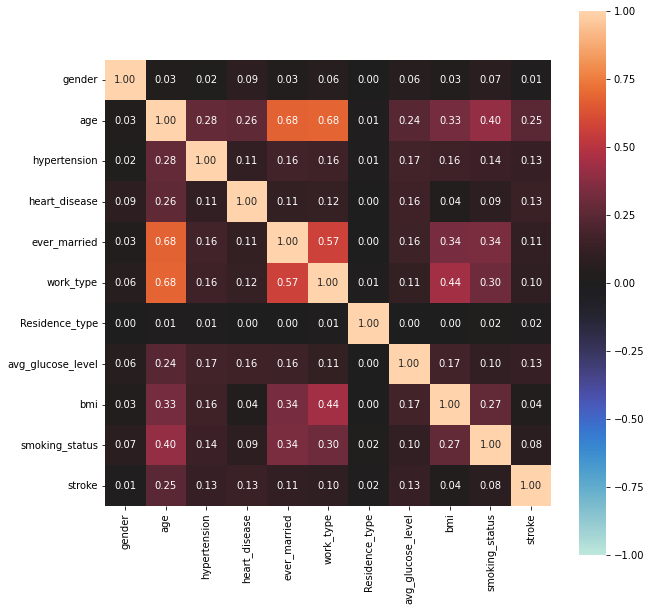

{'corr':                      gender       age  hypertension  heart_disease  \
 gender             1.000000  0.029727      0.021715       0.085749   
 age                0.029727  1.000000      0.276398       0.263796   
 hypertension       0.021715  0.276398      1.000000       0.108306   
 heart_disease      0.085749  0.263796      0.108306       1.000000   
 ever_married       0.029870  0.679125      0.164243       0.114644   
 work_type          0.058593  0.682044      0.162659       0.117627   
 Residence_type     0.000000  0.014180      0.007913       0.003092   
 avg_glucose_level  0.055912  0.238171      0.174474       0.161857   
 bmi                0.028193  0.325942      0.160189       0.038899   
 smoking_status     0.070888  0.399650      0.142575       0.093483   
 stroke             0.009617  0.245257      0.127904       0.134914   
 
                    ever_married  work_type  Residence_type  avg_glucose_level  \
 gender                 0.029870   0.058593        0.000

In [80]:
# Explore correlations
associations(df_copy, figsize=(10,10))

As we can see in correlation heatmap, stroke has a higher correlation with age (0.25) and mild correlation with hypertension, heart_disease and avg_glucose_level. 

Let's explore this correlation. 

###### **Age distribution** 

What is the age of patients who had stroke?

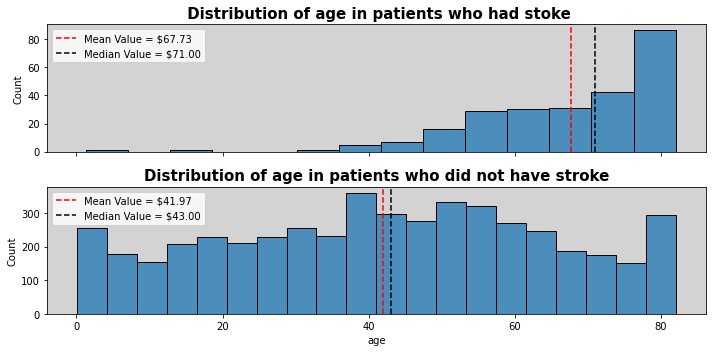

In [81]:
histplot_function(df_stroke, df_no_stroke, 'age')

Most of patients who had stroke are older than 40 years old and the median age is 71 years old. In patients who didn't have stroke the age goes to 0 to 80 years old and the median is 43 years old.

Checking Outliers in age

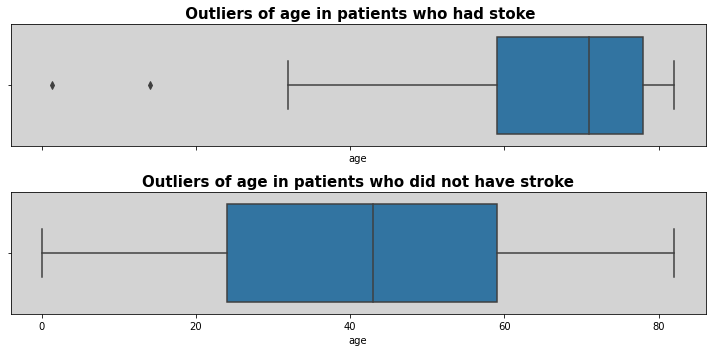

In [84]:
outliers_check(df_stroke, df_no_stroke, 'age')

We can see only 2 outliers in patients who had stroke 

###### **Average of glucose level distribution** 

If patient has high glucose level does he has more proprability to have stroke?

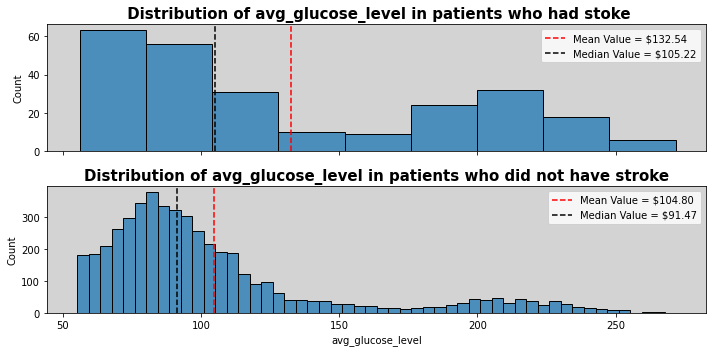

In [85]:
histplot_function(df_stroke, df_no_stroke, 'avg_glucose_level')

Most of patients have normal glucose levels (less than 100). The mean in patients who had stroke is higher (132.54) than in patients who didn't have stroke (104,80). So we can say if patient has high glucose level he has more proprability to have stroke.

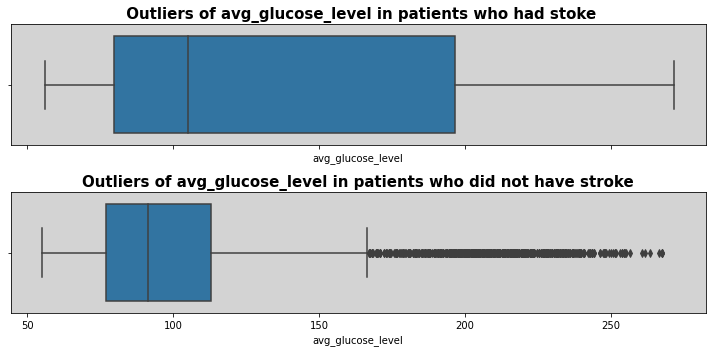

In [86]:
outliers_check(df_stroke, df_no_stroke, 'avg_glucose_level')

In patients who didn't have stroke there are more outliers in average of glucose level.    

###### **Bmi distribution**

If patients has high bmi does he has more proprability to have stroke?

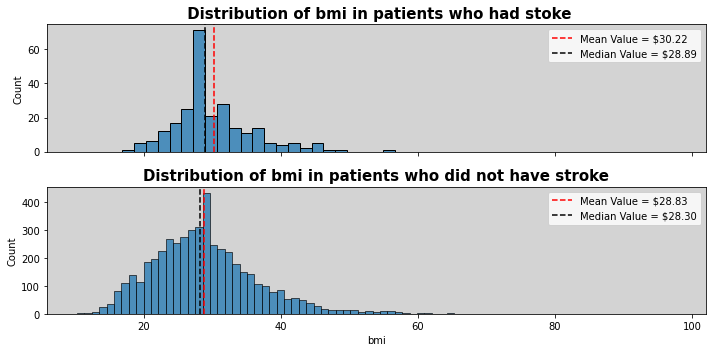

In [87]:
histplot_function(df_stroke, df_no_stroke, 'bmi')

Bmi is very similar in patients who had stroke and who didn't has stroke. So we can not say if patient has high bmi he has more proprability to have stroke.

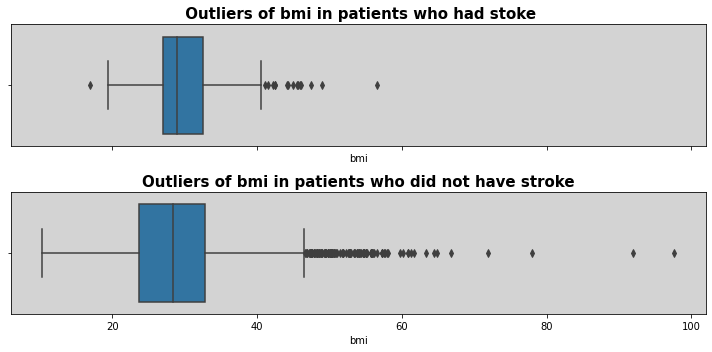

In [88]:
outliers_check(df_stroke, df_no_stroke, 'bmi')

In patients who didn't have stroke there are more outliers in bmi. The max in patients who had stroke is about 60 and in patients who didn't have the max is about 100

###### **Ever married distribution**

Marital status have any correlation with stroke?  

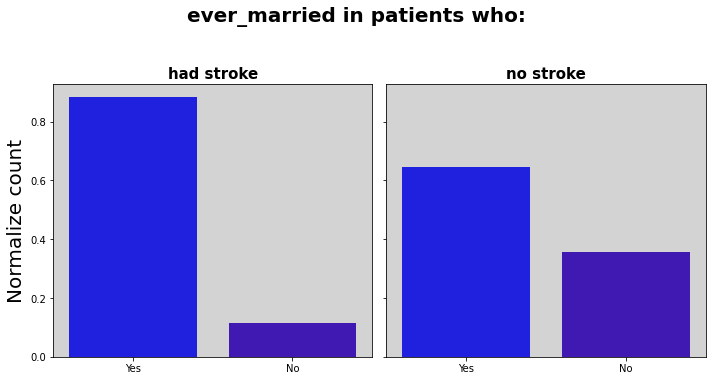

In [97]:
plot_bar(df_stroke, df_no_stroke, 'ever_married')


In patients who didn't have stroke the number of no married is higher (about 30%) than in patients who had stroke (less than 10% is married). It is because this group has younger people than in patients who had stroke.

We can not say that if the patient is married he has more probabilty to has stroke In my control group, no_stroke group,  the number of married also is higher than no married patients. 

###### **Gender distribution**

Stroke is more common in Woman or men?

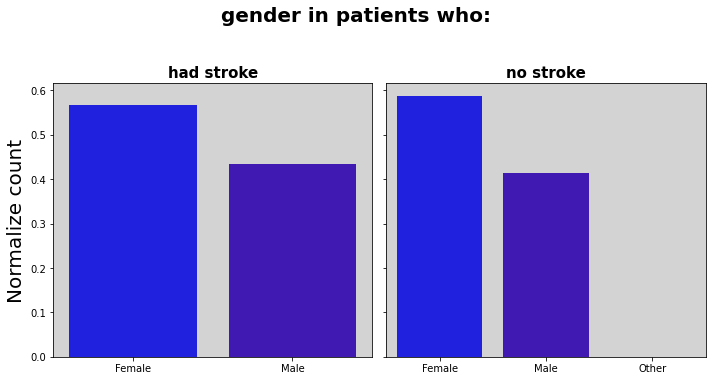

In [98]:
plot_bar(df_stroke, df_no_stroke, 'gender')

I will check the number with value_counts: 

In [99]:
df_stroke['gender'].value_counts(normalize=True)

Female    0.566265
Male      0.433735
Name: gender, dtype: float64

In [94]:
df_no_stroke['gender'].value_counts(normalize=True)

Female    0.586916
Male      0.412878
Other     0.000206
Name: gender, dtype: float64

It is very similar in both dataset of stroke and no stroke, there are more female. We can say that that stroke is more common in female 

###### **Work_type distribution**

Work type has any correlation with stroke?  

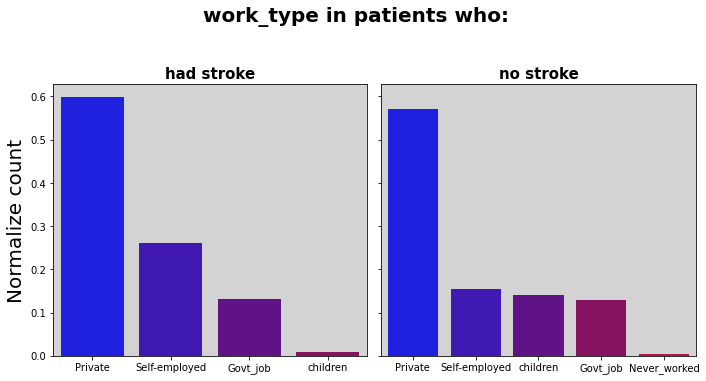

In [100]:
plot_bar(df_stroke, df_no_stroke, 'work_type')

In patients who did not have stroke there are more children. In both group there are more people working in private and self-employed. We can not say that work has a correlation with stroke.

###### **Residence type distribution**

Residence has any correlation with stroke?  

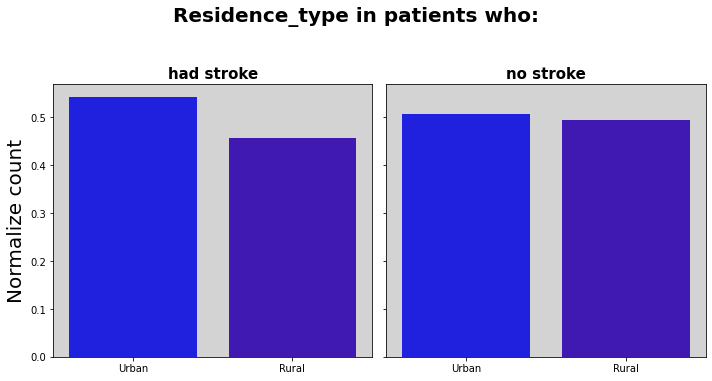

In [101]:
plot_bar(df_stroke, df_no_stroke, 'Residence_type')

Patients who had stroke about 55% live in urban area and 45% in rural area. In patients who did not have stroke is very similar the type of residence. Maybe we can say that the live-style in urban residence can has a correlation with stroke. 


###### **Smoking_status distribution**

If patient smokes or smoked does he has more proprability to have stroke?

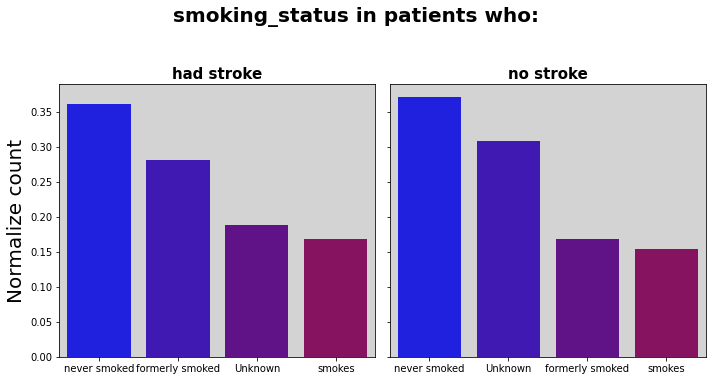

In [102]:
plot_bar(df_stroke, df_no_stroke, 'smoking_status')

The number of patients who had stroke that formerly smoked is higher (more than 25%) than in patients who did not have stroke (about 18%). In no stroke group the unknow status is bigger (about 30%) than in stroke group (about 18%). We can not say that if patient smokes or smoked he has more proprability to have stroke because the number of unknow is high. 

###### **Hypertension distribution**

 If patients has hypertension does he has more proprability to have stroke?

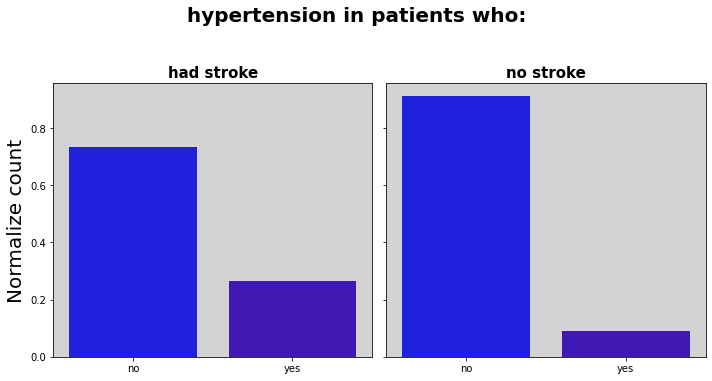

In [103]:
plot_bar(df_stroke, df_no_stroke, 'hypertension')

In patients who had stroke the number of hypertension is higher (about 25%) than in patients who didn't have stroke (less than 10%). So we can say if patients have hypertension they have more proprability to have stroke. 

###### **Heart disease distribution** 

 If patient has heart disease does he has more proprability to have stroke?

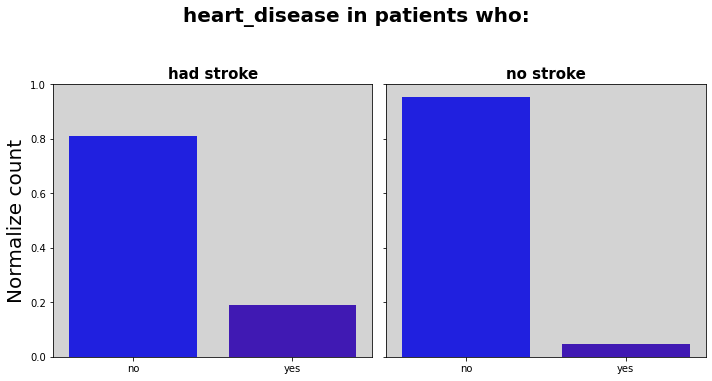

In [104]:
plot_bar(df_stroke, df_no_stroke, 'heart_disease')

In patients who had stroke about 20% have heart disease and in patients who didn't have stroke less than 5% have heart disease. So we can say if the patient has heart disease he has more proprability to have stroke.

## Multiple variables exploratory visualizations

### Correlation beteween age, avg_glucose and stroke 

In [147]:
# Create a function to create a Count Plot
def scatter_plot(x,y):
    palette = {0: 'blue' , 1: 'red'}
    fig, ax = plt.subplots(figsize=(10,8))#, facecolor='w')
    sns.scatterplot(x=x, y=y, hue='stroke', 
                    palette=palette, data=df);
    plt.title(f'{x} and {y} \ncorrelation to Stroke', fontsize = 18, weight='bold')
    plt.xlabel(x, fontsize = 14, weight='bold')
    plt.ylabel(y, fontsize = 14, weight='bold');
    plt.xticks(fontsize = 10, weight='bold')
    plt.yticks(fontsize = 10, weight='bold');
    ax.set_facecolor('lightgray')
    plt.show;

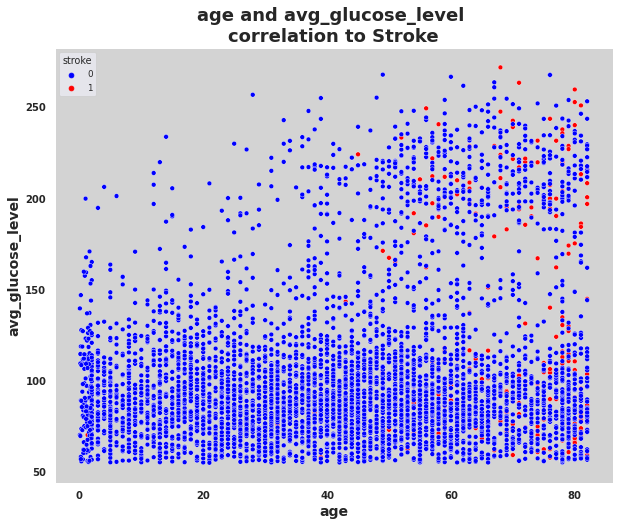

In [148]:
scatter_plot('age', 'avg_glucose_level')

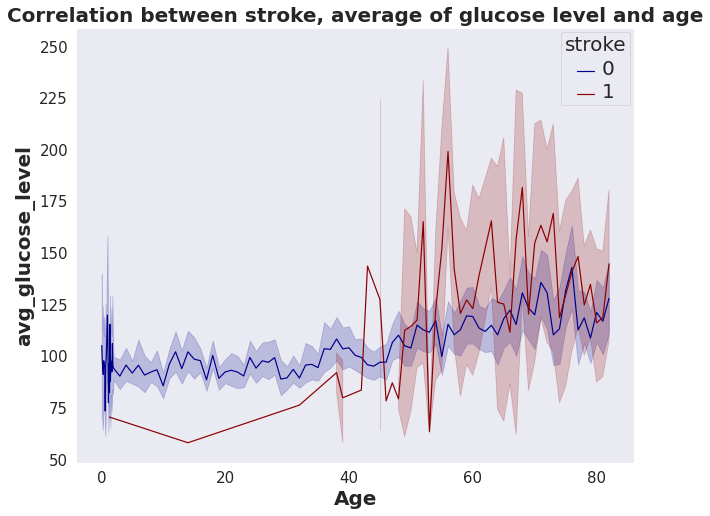

In [164]:
fig, ax = plt.subplots(figsize=(10, 8))
palette = {0: 'darkblue' , 1: 'darkred'}
sns.lineplot(data = df_copy, x='age', y = 'avg_glucose_level', hue= 'stroke', ax=ax, palette = palette)
plt.title('Correlation between stroke, average of glucose level and age', fontsize = 20, fontweight = 'bold' )
plt.xlabel('Age', fontsize=20, fontweight = 'bold')
plt.ylabel('avg_glucose_level', fontsize=20, fontweight = 'bold')
plt.setp(ax.get_legend().get_texts(), fontsize='20') 
plt.setp(ax.get_legend().get_title(), fontsize='20')
plt.xticks(fontsize = 15)#, weight='bold')
plt.yticks(fontsize = 15)#, weight='bold')
plt.show()

Patients who had stroke (1) are older than 40 years old and have higher glucose level than in patients who didn't have stroke (0). 

### Correlation between heart disease, avg_glucose and stroke 

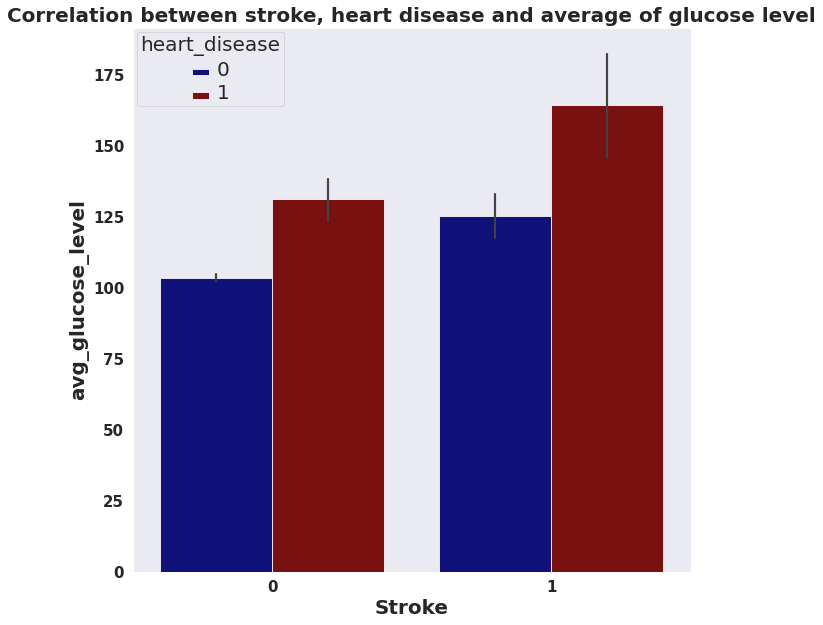

In [163]:
sns.set_style('dark')
sns.set_context("paper")
palette = {0: 'darkblue' , 1: 'darkred'}

fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(data=df_copy, hue = 'heart_disease', y = 'avg_glucose_level', x= 'stroke', ax=ax, palette = palette)
plt.title('Correlation between stroke, heart disease and average of glucose level', fontsize = 20, fontweight = 'bold' )
plt.xlabel('Stroke', fontsize=20, fontweight = 'bold')
plt.ylabel('avg_glucose_level', fontsize=20, fontweight = 'bold')
plt.setp(ax.get_legend().get_texts(), fontsize='20') 
plt.setp(ax.get_legend().get_title(), fontsize='20')
plt.xticks(fontsize = 15, weight='bold')
plt.yticks(fontsize = 15, weight='bold')
plt.show()

Patients who have high level of glucose had stroke (1) and have heart disease(1). 

###Correlation between average of glucose, hypertension and stroke

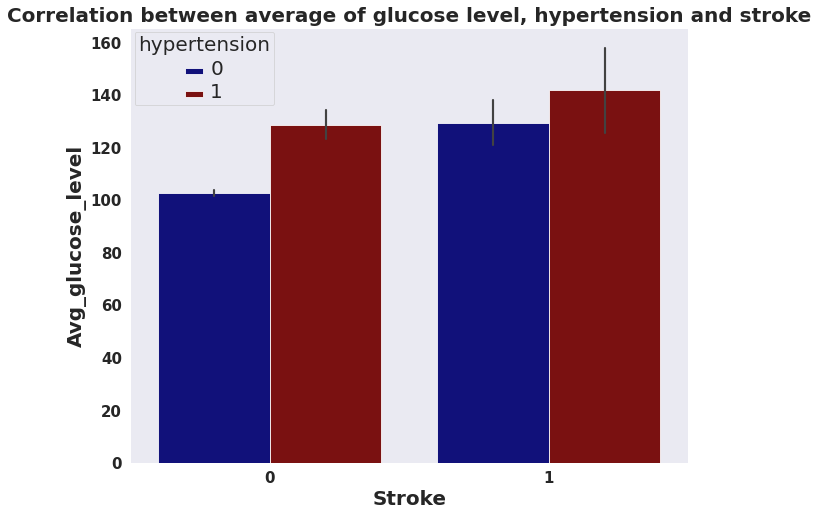

In [166]:
fig, ax = plt.subplots(figsize=(10, 8))
palette = {0: 'darkblue' , 1: 'darkred'}
sns.barplot(data=df_copy, hue= 'hypertension', y = 'avg_glucose_level', x= 'stroke', ax=ax, palette = palette)
plt.title('Correlation between average of glucose level, hypertension and stroke', fontsize = 20, fontweight = 'bold' )
plt.xlabel('Stroke', fontsize=20, fontweight = 'bold')
plt.ylabel('Avg_glucose_level', fontsize=20, fontweight = 'bold')
plt.setp(ax.get_legend().get_texts(), fontsize='20') 
plt.setp(ax.get_legend().get_title(), fontsize='20')
plt.xticks(fontsize = 15, weight='bold')
plt.yticks(fontsize = 15, weight='bold')
plt.show()


Patients who have higer levels of glucose have hypertension and had stroke. 

# Machine Learning 

## Preprocessing

### Reloading data

In [167]:
# we need go back to original dataset 
df_ml = df.copy()
df_ml.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Prepare/clean the data

#### Dropping unnecessary columns.

In [168]:
# dropping id
df_ml = df_ml.drop(columns='id')
df_ml.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


#### Duplicated Data

In [169]:
# checking for duplicates
df_ml.duplicated().sum()

0

#### Missing values


In [170]:
df_ml.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

We need to use Simple Imputer to fill missing values but afther X/y split to preventing data leakage. 

### Defining X and y 

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. So,  the column stroke is the target. 

In [171]:
# matrix
X = df_ml.drop(columns='stroke')

# target
y = df_ml['stroke']

In [172]:
# checking X
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked


### Train-Test Split

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X_train.shape

(3832, 10)

In [174]:
print('size of X')
print(len(X))
print('size of X_train(X)')
print(len(X_train))

size of X
5110
size of X_train(X)
3832


### Making a Preprocessing

#### Selector columns
In this dataset we have numerical and categorical columns. So we need use make_column_selector

In [175]:
# make selector columns:
# numerical columns
num_selector = make_column_selector(dtype_include = 'number')

# categorical columns
cat_selector = make_column_selector(dtype_include = 'object')

In [176]:
cat_selector(X_train)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

There is no ordinal data in categorical columns, so we need to use ohe for all. 

In [177]:
num_selector(X_train)

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

We need to change 'hypertension', 'heart_disease' to string because they are not numeric features. Actually they are categorical feature, ordinal. 

In [178]:
df_ml['hypertension'] = df_ml['hypertension'].astype(str)
df_ml['heart_disease'] = df_ml['heart_disease'].astype(str)


In [179]:
# check again if worked 
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   object 
 3   heart_disease      5110 non-null   object 
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 439.3+ KB


In bmi column has missing values, we need make a pipeline only for numerical data with SimpleInputer and scaler. 

#### One HotEncoder and Scaler

In [180]:
# instantiate an ohe for categorical columns
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
# instantiate scaler for numeric columns
scaler = StandardScaler()


#### SimpleImputer for numerical column

In [181]:
mean_imputer = SimpleImputer(strategy = 'median')

#### Make a numerical pipeline with SimpleImputer and Scaler

In [182]:
numeric_pipeline = make_pipeline(mean_imputer, scaler)
numeric_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [183]:
# checkin pipeline in X_train
test_numeric_pipeline = numeric_pipeline.fit_transform(X_train[num_selector(X_train)])
test_numeric_pipeline

array([[ 0.7372167 ,  3.1393509 , -0.24139427,  2.82330103,  1.93021962],
       [-0.10654894, -0.31853719, -0.24139427, -0.48981357, -0.04642431],
       [ 0.38194696, -0.31853719, -0.24139427, -0.41189936,  0.21366042],
       ...,
       [-1.87579225, -0.31853719, -0.24139427, -0.19686495, -1.4378776 ],
       [ 1.62539105, -0.31853719, -0.24139427,  1.97768977,  0.2786816 ],
       [ 0.11549465, -0.31853719, -0.24139427, -0.13369722,  2.78849922]])

In [184]:
# checking missin values
np.isnan(test_numeric_pipeline).sum()

0

#### Make a column Transformer

In [185]:
# ColumTransformer, put all together: numerical and categorical 
preprocessor = make_column_transformer((numeric_pipeline, num_selector ), (ohe, cat_selector ), remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fc6e7b21580>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fc6e7b21640>)])

In [186]:
## Test Col Transformer
X_train_processed = preprocessor.fit_transform(X_train)

In [187]:
# checking missing values 
np.isnan(X_train_processed).sum()

0

In [188]:
# checking dtype
X_train_processed.dtype

dtype('float64')

### Create and compare differents model types to stroke prediction. 

This is classification problem lets test some models. Remember the target is unbalaced so I will use SMOTE to oversample my data. But first lets check with logistic regression default values. 

#### Function to evaluate all model 

In [189]:
def eval_classification(model, X_train, X_test, y_train, y_test):
  print('Train Report:')
  print(classification_report(y_train, model.predict(X_train)))
  print('Test Report:')
  print(classification_report(y_test, model.predict(X_test)))
  ConfusionMatrixDisplay.from_predictions(y_test, model.predict(X_test),normalize='true',cmap='Greens')

### Logistic regression model

#### Logistic regression model - default values 

In [190]:
# model default values
logreg_default = LogisticRegression(random_state = 42)
# create pipeline
logreg_pipe = make_pipeline(preprocessor, logreg_default)
# fit the model in train data
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc6e7b21580>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc6e7b21640>)])),
                ('logisticregression', LogisticRegression(random_state=42))])

In [191]:
# save predictions 
train_preds_default = logreg_pipe.predict(X_train)
test_preds_default = logreg_pipe.predict(X_test)

##### Evaluate 

Train Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3663
           1       0.00      0.00      0.00       169

    accuracy                           0.96      3832
   macro avg       0.48      0.50      0.49      3832
weighted avg       0.91      0.96      0.93      3832

Test Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       1.00      0.01      0.02        80

    accuracy                           0.94      1278
   macro avg       0.97      0.51      0.50      1278
weighted avg       0.94      0.94      0.91      1278



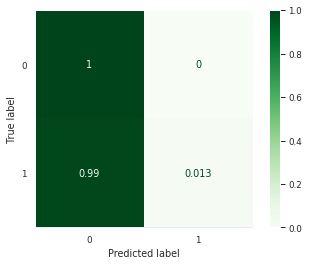

In [194]:
eval_classification(logreg_pipe, X_train, X_test, y_train, y_test)

##### Observation 

The number of False Negative was to high 99% and recall is too low for 1(stroke). The problem is that the target is unbalaced. Let's try SMOTE to oversampling the target.  

#### Create a pipeline with preprocessor and smote

In [206]:
smote_pipe = make_sampler_pipeline(preprocessor, smote)
#Fit and evaluate the model pipeline
smote_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc6e7b21580>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc6e7b21640>)])),
                ('smote', SMOTE(random_state=42))])

In [202]:
# check if smote worked
X_train_processed, y_train_processed = log_reg_smote_pipe.fit_resample(X_train, y_train)

In [211]:
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
print('Target is balanced:')
print(y_train_processed.value_counts())

0 missing values in training data


All data in X_train_processed are float64


shape of data is (7326, 20)


Target is balanced:
0    3663
1    3663
Name: stroke, dtype: int64


#### Logistic regression with oversampling: Smote

In [213]:
#Create model pipeline with preprocessor, SMOTE, and model
smote = SMOTE(random_state = 42)
log_reg_smote_pipe = make_sampler_pipeline(preprocessor, smote, logreg_default)
#Fit and evaluate the model pipeline
log_reg_smote_pipe.fit(X_train, y_train)



Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc6e7b21580>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc6e7b21640>)])),
                ('smote', SMOTE(random_state=42)),
                ('logisticregression', LogisticRegression(random_state=42))])

In [214]:
# save predictions 
train_preds_default = log_reg_smote_pipe.predict(X_train)
test_preds_default = log_reg_smote_pipe.predict(X_test)


##### Evaluate

Train Report:
              precision    recall  f1-score   support

           0       0.99      0.75      0.85      3663
           1       0.13      0.80      0.22       169

    accuracy                           0.76      3832
   macro avg       0.56      0.78      0.54      3832
weighted avg       0.95      0.76      0.83      3832

Test Report:
              precision    recall  f1-score   support

           0       0.98      0.76      0.85      1198
           1       0.16      0.71      0.27        80

    accuracy                           0.76      1278
   macro avg       0.57      0.74      0.56      1278
weighted avg       0.92      0.76      0.82      1278



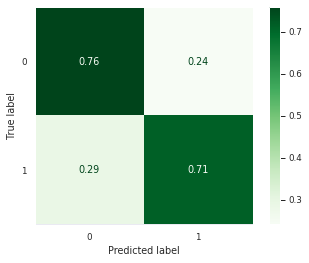

In [215]:
eval_classification(log_reg_smote_pipe, X_train, X_test, y_train, y_test)


##### Observation 
The number of false negative is better with smote but is 29% is too high. We need increase recall that is 71% in test data to decrease false negative rate. The accuracy in the test data was 76%.  

Let't try tunne using GridSearchCV

#### Tunned Logistic Regression with Smote

In [216]:
log_reg_smote_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer', ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fc6e7b21580>),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fc6e7b21640>)])),
  ('smote', SMOTE(random_state=42)),
  ('logisticregression', LogisticRegression(random_state=42))],
 'verbose': Fal

In [224]:
# dictionary with diferent parameters
params = {'logisticregression__max_iter': range(100, 1000, 50), 
          'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 
          'logisticregression__penalty': ['l1', 'l2']},
          #'logisticregression__solver': ['lbfgs', 'liblinear']}         

In [225]:
log_reg_smote_pipe_gs = GridSearchCV(log_reg_smote_pipe, params)

log_reg_smote_pipe_gs.fit(X_train, y_train)
print('Best log_reg Parameters:')
print(log_reg_smote_pipe_gs.best_params_)
best_pipe = log_reg_smote_pipe_gs.best_estimator_
print(f'Accuracy of best log_reg model is: {best_pipe.score(X_test, y_test)}')

Best log_reg Parameters:
{'logisticregression__C': 0.0001, 'logisticregression__max_iter': 100, 'logisticregression__penalty': 'l2'}
Accuracy of best log_reg model is: 0.7582159624413145


##### Evaluate

Train Report:
              precision    recall  f1-score   support

           0       0.99      0.76      0.86      3663
           1       0.13      0.76      0.22       169

    accuracy                           0.76      3832
   macro avg       0.56      0.76      0.54      3832
weighted avg       0.95      0.76      0.83      3832

Test Report:
              precision    recall  f1-score   support

           0       0.97      0.76      0.86      1198
           1       0.16      0.68      0.26        80

    accuracy                           0.76      1278
   macro avg       0.57      0.72      0.56      1278
weighted avg       0.92      0.76      0.82      1278



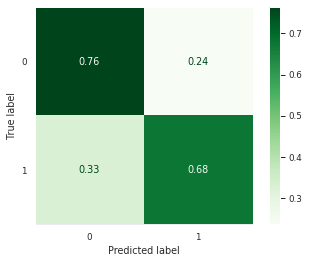

In [226]:
eval_classification(best_pipe, X_train, X_test, y_train, y_test)

##### Observation 
After tunned logist regression model the recall in the test data was worse 68% and False Negative was higher 33% and accuracy was the same 76%.  So with logistic regression the better model was with default parameters and with smote. 

#### Logistic regression with PCA and SMOTE

The better result so far was with smote so lets try use principal component analysis (PCA)

In [227]:
# PCA with 95% of the variance
pca = PCA(n_components=.95)
#Create model pipeline with preprocessor, SMOTE, PCA and model
smote = SMOTE(random_state = 42)
log_reg_smote_pca_pipe = make_sampler_pipeline(preprocessor, smote, pca, logreg_default)
#Fit and evaluate the model pipeline
log_reg_smote_pca_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc6e7b21580>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc6e7b21640>)])),
                ('smote', SMOTE(random_state=42)),
                ('pca', PCA(n_components=0.95)),
                ('logisticregression', LogisticRegression(random_state=42))])

#### Evaluate 

Train Report:
              precision    recall  f1-score   support

           0       0.99      0.75      0.85      3663
           1       0.13      0.82      0.22       169

    accuracy                           0.75      3832
   macro avg       0.56      0.78      0.54      3832
weighted avg       0.95      0.75      0.82      3832

Test Report:
              precision    recall  f1-score   support

           0       0.98      0.74      0.85      1198
           1       0.17      0.78      0.28        80

    accuracy                           0.75      1278
   macro avg       0.57      0.76      0.56      1278
weighted avg       0.93      0.75      0.81      1278



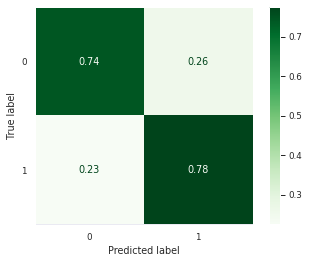

In [228]:
eval_classification(log_reg_smote_pca_pipe, X_train, X_test, y_train, y_test)

#### Observation 

The false negative was better with 23%, without PCA was 29% and the recall in test data also was better with 78%, without PCA was 71%. The accuracy in the test data was 75% with PCA and without PCA was 76%. 

### Decision Tree Classifier
  

#### Decision Tree Classifier with SMOTE
Since the target is unbalaced and with Logistic Regression we have better result with Smote let's try SMOTE with decision tree model.

In [229]:
# instantiate a model
dec_tree = DecisionTreeClassifier(random_state = 42)
# make pipeline
dec_tree_smote_pipe = make_sampler_pipeline(preprocessor, smote, dec_tree )
#Fit the model pipeline
dec_tree_smote_pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc6e7b21580>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc6e7b21640>)])),
                ('smote', SMOTE(random_state=42)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

##### Evaluate

Train Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3663
           1       1.00      1.00      1.00       169

    accuracy                           1.00      3832
   macro avg       1.00      1.00      1.00      3832
weighted avg       1.00      1.00      1.00      3832

Test Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1198
           1       0.09      0.11      0.10        80

    accuracy                           0.87      1278
   macro avg       0.52      0.52      0.52      1278
weighted avg       0.89      0.87      0.88      1278



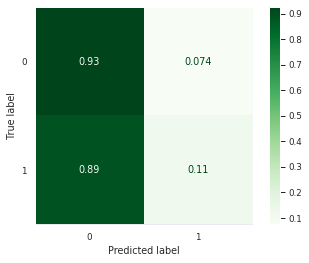

In [230]:
eval_classification(dec_tree_smote_pipe, X_train, X_test, y_train, y_test)

##### Observation 

With decision tree model the recall was worse than logistic regression. This model is overfiting since was much better with train data. Let's try this model with PCA. 

#### Decision Tree Classifier with SMOTE and PCA


In [231]:
# make pipeline with smote and pca
dec_tree_smote_pca_pipe = make_sampler_pipeline(preprocessor, smote, pca, dec_tree )
#Fit the model pipeline
dec_tree_smote_pca_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc6e7b21580>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc6e7b21640>)])),
                ('smote', SMOTE(random_state=42)),
                ('pca', PCA(n_components=0.95)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

##### Evaluate

Train Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3663
           1       1.00      1.00      1.00       169

    accuracy                           1.00      3832
   macro avg       1.00      1.00      1.00      3832
weighted avg       1.00      1.00      1.00      3832

Test Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1198
           1       0.16      0.24      0.19        80

    accuracy                           0.88      1278
   macro avg       0.56      0.58      0.56      1278
weighted avg       0.90      0.88      0.89      1278



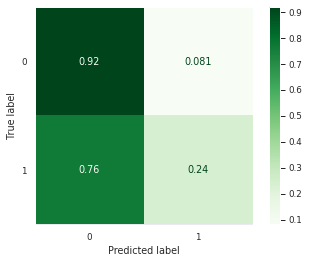

In [232]:
eval_classification(dec_tree_smote_pca_pipe, X_train, X_test, y_train, y_test)

##### Observation 
The result was better with PCA, but recall in test data was too low(24%) and False Negative rate was too high (76%). 

Let's try random Forest

### Random Forest

#### Random Forest with smote

In [233]:
# instantiate a model
rf = RandomForestClassifier(random_state = 42)
# make pipeline
rf_smote_pipe = make_sampler_pipeline(preprocessor, smote, rf )
#Fit the model pipeline
rf_smote_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc6e7b21580>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc6e7b21640>)])),
                ('smote', SMOTE(random_state=42)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

##### Evaluate

Train Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3663
           1       1.00      1.00      1.00       169

    accuracy                           1.00      3832
   macro avg       1.00      1.00      1.00      3832
weighted avg       1.00      1.00      1.00      3832

Test Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1198
           1       0.17      0.05      0.08        80

    accuracy                           0.92      1278
   macro avg       0.55      0.52      0.52      1278
weighted avg       0.89      0.92      0.91      1278



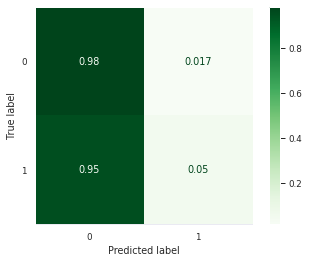

In [234]:
eval_classification(rf_smote_pipe, X_train, X_test, y_train, y_test)

##### Observation 
The model is overfitting, it was good in train data but not in test data, and False Negative rate was too high 95%. Let's use PCA to reduce overfitting

#### Random Forest with smote and PCA


In [235]:
# make pipeline
rf_smote_pca_pipe = make_sampler_pipeline(preprocessor, smote, pca, rf )
#Fit the model pipeline
rf_smote_pca_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc6e7b21580>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc6e7b21640>)])),
                ('smote', SMOTE(random_state=42)),
                ('pca', PCA(n_components=0.95)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

##### Evaluate

Train Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3663
           1       1.00      1.00      1.00       169

    accuracy                           1.00      3832
   macro avg       1.00      1.00      1.00      3832
weighted avg       1.00      1.00      1.00      3832

Test Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1198
           1       0.13      0.12      0.13        80

    accuracy                           0.89      1278
   macro avg       0.54      0.54      0.54      1278
weighted avg       0.89      0.89      0.89      1278



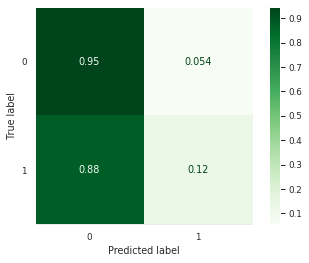

In [236]:
eval_classification(rf_smote_pca_pipe, X_train, X_test, y_train, y_test)

##### Observation
Was better with PCA, but recall was low and false negative rate was high. Let's tunned it 

### XGBClassifier()

In [237]:
xgb_boosting = XGBClassifier()
xgb_smote_pipe = make_sampler_pipeline(preprocessor, smote,xgb_boosting)
xgb_smote_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc6e7b21580>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc6e7b21640>)])),
                ('smote', SMOTE(random_state=42)),
                ('xgbclassifier', XGBClassifier())])

#### Evaluate

Train Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      3663
           1       0.25      0.53      0.34       169

    accuracy                           0.91      3832
   macro avg       0.61      0.73      0.64      3832
weighted avg       0.94      0.91      0.92      3832

Test Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1198
           1       0.20      0.30      0.24        80

    accuracy                           0.88      1278
   macro avg       0.58      0.61      0.59      1278
weighted avg       0.90      0.88      0.89      1278



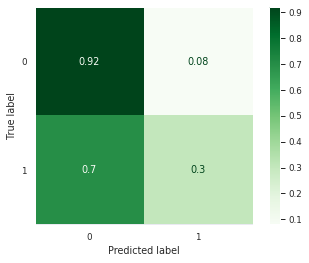

In [238]:
eval_classification(xgb_smote_pipe, X_train, X_test, y_train, y_test)

#### Observation 
The recall was low in Test data 30% and False Negative rate was too high 70%. Let's try use  Feature Engineering to reduce outilers and improve false negative rate. 

## Categorical Feature Engineering

In [239]:
# make a new copy df_machine_learnig_feature_engineering = df_ml_fe
df_ml_fe = df_ml.copy()

In [240]:
for col in df_ml_fe.select_dtypes('object'):
  print(col, df_ml[col].nunique())

gender 3
hypertension 2
heart_disease 2
ever_married 2
work_type 5
Residence_type 2
smoking_status 4


### Smoking_status
Let's combine smoking_status: formerly smoked + smokes = smokes_or_smoked 

In [241]:
df_ml_fe['smoking_status'] = df_ml_fe['smoking_status'].replace(['formerly smoked', 'smokes'], 'smokes_or_smoked')
df_ml_fe['smoking_status'].value_counts() 

never smoked        1892
smokes_or_smoked    1674
Unknown             1544
Name: smoking_status, dtype: int64

### Gender
Let's drop Other in gender column

In [242]:
df_ml_fe = df_ml_fe.drop(df_ml_fe.index[df_ml['gender'] == 'Other'])
df_ml_fe['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

## Numeric Feature Engineering

### Age
For Age column let's round it to the nearest decade.

In [243]:
df_ml_fe['age'] = df_ml_fe['age'].round(-1)
df_ml_fe['age'].value_counts()


60.0    814
40.0    773
50.0    713
20.0    594
30.0    551
80.0    518
70.0    447
10.0    379
0.0     320
Name: age, dtype: int64

We can combine gender and age in one column [GenderAge]

In [244]:
df_ml_fe['Gender_Age'] = df_ml_fe['gender'] + df_ml_fe['age'].astype('string')
df_ml_fe.drop(columns=['gender','age'], inplace=True)
df_ml_fe.head()

,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Gender_Age
0,0,1,Yes,Private,Urban,228.69,36.6,smokes_or_smoked,1,Male70.0
1,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Female60.0
2,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Male80.0
3,0,0,Yes,Private,Urban,171.23,34.4,smokes_or_smoked,1,Female50.0
4,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Female80.0


### Avg_glucose_level
We can change avg_glucose_level to normal(<100):0 or high(>100):1

In [245]:
for level in df_ml_fe['avg_glucose_level']: 
  if level > 100:
    df_ml_fe['avg_glucose_level'] = df_ml_fe['avg_glucose_level'].replace(level, 1)
  else:
    df_ml_fe['avg_glucose_level'] = df_ml_fe['avg_glucose_level'].replace(level, 0)


In [246]:
df_ml_fe['avg_glucose_level'].value_counts()

0.0    3131
1.0    1978
Name: avg_glucose_level, dtype: int64

### BMI
In Explanotory visual analysis there is no big difference between stroke and no stroke. Let's drop this column,  

In [247]:
df_ml_fe = df_ml_fe.drop(columns='bmi')

## New dataframe (after feature engineering) 

In [248]:
df_ml_fe.describe(include = 'all')

,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,Gender_Age
count,5109,5109,5109,5109,5109,5109.000000,5109,5109.000000,5109
unique,2,2,2,5,2,NaN,3,NaN,18
top,0,0,Yes,Private,Urban,NaN,never smoked,NaN,Female40.0
freq,4611,4833,3353,2924,2596,NaN,1892,NaN,499
mean,NaN,NaN,NaN,NaN,NaN,0.387160,NaN,0.048738,NaN
std,NaN,NaN,NaN,NaN,NaN,0.487148,NaN,0.215340,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000,NaN


In [249]:
# check missing values
df_ml_fe.isna().sum()

hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
smoking_status       0
stroke               0
Gender_Age           0
dtype: int64

In [250]:
df_ml_fe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hypertension       5109 non-null   object 
 1   heart_disease      5109 non-null   object 
 2   ever_married       5109 non-null   object 
 3   work_type          5109 non-null   object 
 4   Residence_type     5109 non-null   object 
 5   avg_glucose_level  5109 non-null   float64
 6   smoking_status     5109 non-null   object 
 7   stroke             5109 non-null   int64  
 8   Gender_Age         5109 non-null   string 
dtypes: float64(1), int64(1), object(6), string(1)
memory usage: 399.1+ KB


Now we don't have missing values, so we don't need SimpleImputer and all columns are object so we don't need make_column_selecto or scaler. 

In [251]:
df_ml_fe['Gender_Age'] = df_ml_fe['Gender_Age'].astype(object)
df_ml_fe['avg_glucose_level'] = df_ml_fe['avg_glucose_level'].astype(object)
df_ml_fe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   hypertension       5109 non-null   object
 1   heart_disease      5109 non-null   object
 2   ever_married       5109 non-null   object
 3   work_type          5109 non-null   object
 4   Residence_type     5109 non-null   object
 5   avg_glucose_level  5109 non-null   object
 6   smoking_status     5109 non-null   object
 7   stroke             5109 non-null   int64 
 8   Gender_Age         5109 non-null   object
dtypes: int64(1), object(8)
memory usage: 399.1+ KB


### X, y Train/test split

In [252]:
# matrix
X = df_ml_fe.drop(columns='stroke')

# target
y = df_ml_fe['stroke']

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)


### Preprocessor 

In [254]:
# don't need to do pipeline because it is only one transformation
preprocessor_fe = make_column_transformer((ohe, cat_selector ), remainder='passthrough')
preprocessor_fe

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fc6e7b21640>)])

## Logistic regression with smote and feature engineering

In [255]:
#Create model pipeline with preprocessor, SMOTE, and model
log_reg_smote_fe_pipe = make_sampler_pipeline(preprocessor_fe, smote, logreg_default)
#Fit and evaluate the model pipeline
log_reg_smote_fe_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc6e7b21640>)])),
                ('smote', SMOTE(random_state=42)),
                ('logisticregression', LogisticRegression(random_state=42))])

#### Evaluate 

Train Report:
              precision    recall  f1-score   support

           0       0.99      0.74      0.84      3662
           1       0.12      0.81      0.22       169

    accuracy                           0.74      3831
   macro avg       0.56      0.77      0.53      3831
weighted avg       0.95      0.74      0.82      3831

Test Report:
              precision    recall  f1-score   support

           0       0.98      0.73      0.84      1198
           1       0.17      0.80      0.28        80

    accuracy                           0.74      1278
   macro avg       0.57      0.77      0.56      1278
weighted avg       0.93      0.74      0.80      1278



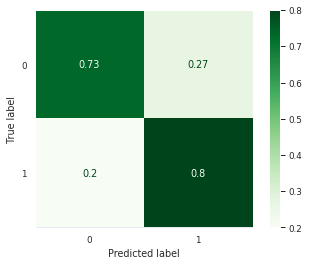

In [256]:
eval_classification(log_reg_smote_fe_pipe, X_train, X_test, y_train, y_test)

#### Observation 
The false negative rate is lower than other models 17% and the recall is better than others models, in test data was 82%.  The accuracy is similar with original dataframe 75%. Let's try tunned it. 

## Tunned logist regression with smote and feature enginnering 

In [257]:
log_reg_smote_fe_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer', ColumnTransformer(remainder='passthrough',
                     transformers=[('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fc6e7b21640>)])),
  ('smote', SMOTE(random_state=42)),
  ('logisticregression', LogisticRegression(random_state=42))],
 'verbose': False,
 'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc6e7b21640>)]),
 'smote': SMOTE(random_state=42),
 'logisticregression': LogisticRegression(random_state=42),
 

In [258]:
# dictionary with diferent parameters
params = {'logisticregression__max_iter': range(100, 1000, 50), 
          'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 
          'logisticregression__penalty': ['l1', 'l2']}  

In [259]:
log_reg_smote_pipe_gs = GridSearchCV(log_reg_smote_fe_pipe, params)

log_reg_smote_pipe_gs.fit(X_train, y_train)
print('Best log_reg Parameters:')
print(log_reg_smote_pipe_gs.best_params_)
best_pipe = log_reg_smote_pipe_gs.best_estimator_
print(f'Accuracy of best log_reg model is: {best_pipe.score(X_test, y_test)}')

Best log_reg Parameters:
{'logisticregression__C': 0.1, 'logisticregression__max_iter': 100, 'logisticregression__penalty': 'l2'}
Accuracy of best log_reg model is: 0.7449139280125195


The accuracy is the same, let's see if FN rate and recall

### Evaluate 

Train Report:
              precision    recall  f1-score   support

           0       0.99      0.74      0.85      3662
           1       0.13      0.80      0.22       169

    accuracy                           0.74      3831
   macro avg       0.56      0.77      0.53      3831
weighted avg       0.95      0.74      0.82      3831

Test Report:
              precision    recall  f1-score   support

           0       0.98      0.74      0.84      1198
           1       0.17      0.80      0.28        80

    accuracy                           0.74      1278
   macro avg       0.58      0.77      0.56      1278
weighted avg       0.93      0.74      0.81      1278



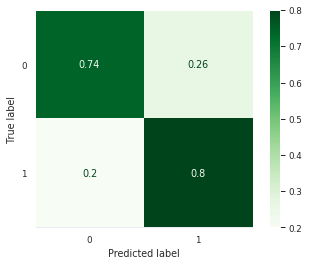

In [260]:
eval_classification(best_pipe, X_train, X_test, y_train, y_test)

### Observation 

The recall and FN rate was the same than default model. 

##XGBclassifier with smote and feature enginnering

In [261]:
#Create model pipeline with preprocessor, SMOTE, and model
xgb_smote_fe_pipe = make_sampler_pipeline(preprocessor_fe, smote, xgb_boosting)
#Fit and evaluate the model pipeline
xgb_smote_fe_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc6e7b21640>)])),
                ('smote', SMOTE(random_state=42)),
                ('xgbclassifier', XGBClassifier())])

### Evaluate

Train Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      3662
           1       0.20      0.45      0.28       169

    accuracy                           0.90      3831
   macro avg       0.59      0.68      0.61      3831
weighted avg       0.94      0.90      0.91      3831

Test Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1198
           1       0.27      0.45      0.34        80

    accuracy                           0.89      1278
   macro avg       0.62      0.69      0.64      1278
weighted avg       0.92      0.89      0.90      1278



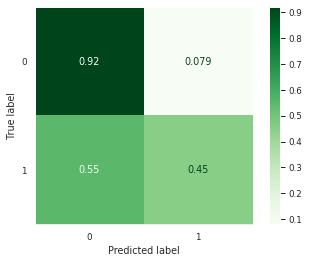

In [262]:
eval_classification(xgb_smote_fe_pipe, X_train, X_test, y_train, y_test)

### Observation 
The accuracy in test date is higher with XGB 87% but recall was lower and FN rate was higher. Let's try tunned it. 

## Tunned XGBclassifier with smote and feature engineering

In [263]:
xgb_smote_fe_pipe.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc6e7b21640>)])),
                ('smote', SMOTE(random_state=42)),
                ('xgbclassifier', XGBClassifier())])>

In [264]:
#Gridsearch
params = {'xgbclassifier__max_depth': list(range(1,10)), 
          'xgbclassifier__learning_rate': [.1, .01],
          'xgbclassifier__n_estimators' : list(range(40, 141, 20)),
          'xgbclassifier__gamma': [0.1, .02]}

In [265]:
xgb_smote_pipe_gs = GridSearchCV(xgb_smote_fe_pipe, params)

xgb_smote_pipe_gs.fit(X_train, y_train)
print('Best log_reg Parameters:')
print(xgb_smote_pipe_gs.best_params_)
best_pipe_xgb_smote = xgb_smote_pipe_gs.best_estimator_
print(f'Accuracy of best log_reg model is: {best_pipe_xgb_smote.score(X_test, y_test)}')

Best log_reg Parameters:
{'xgbclassifier__gamma': 0.02, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 8, 'xgbclassifier__n_estimators': 140}
Accuracy of best log_reg model is: 0.9217527386541471


### Evaluate 

Train Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3662
           1       0.49      0.40      0.44       169

    accuracy                           0.96      3831
   macro avg       0.73      0.69      0.71      3831
weighted avg       0.95      0.96      0.95      3831

Test Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1198
           1       0.19      0.07      0.11        80

    accuracy                           0.92      1278
   macro avg       0.56      0.53      0.53      1278
weighted avg       0.89      0.92      0.91      1278



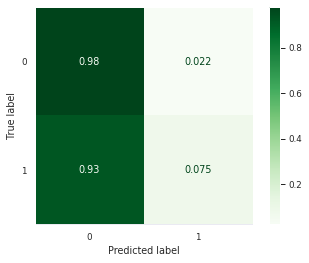

In [266]:
eval_classification(best_pipe_xgb_smote, X_train, X_test, y_train, y_test)

### Observation 
The accuracyin test data was higher than other models (91%) but with lower recall and higher false negative rate. 

# Summary

***Correlation between stroke, age, hypertension, heart disease and average glucose level ***

With heatmap plot we can see that stroke has high correlation with age, hypertension, heart disease and average glucose level. 

*   Most of patients who had stroke are older than 40 years old and the median age is 71 years old.
*   The mean of glucose level in patients who had stroke is higher (132.54) than in patients who didn't have stroke (104,80). So we can say if patient has high glucose level he has more proprability to have stroke.

*   Patients who have high level of glucose had stroke and have heart disease.
*   Patients who have higer levels of glucose have hypertension and had stroke.



**Model Performance**

Overall, the best model is definitely the Logistic Regression after we change the original dataframe with some feature engineering. In test data the accuracy was 75%, recall 82% and false negative rate was 17%.

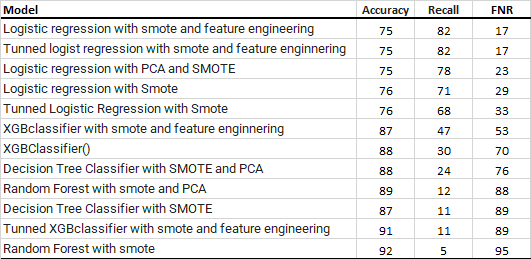